In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding= 'unicode_escape')


In [13]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


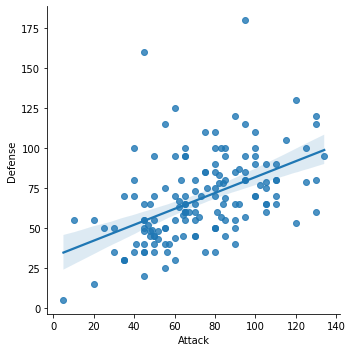

In [14]:
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

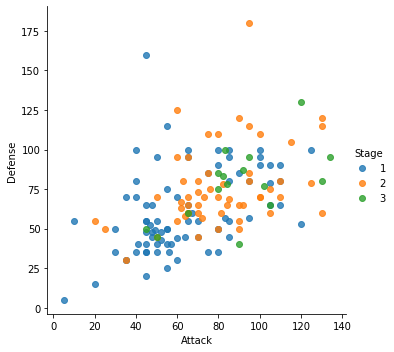

In [15]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage


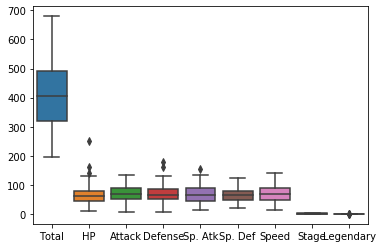

In [16]:
# Boxplot
sns.boxplot(data=df)

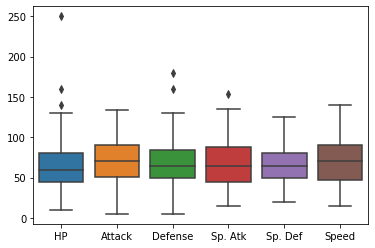

In [17]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)


#  Seaborn themes

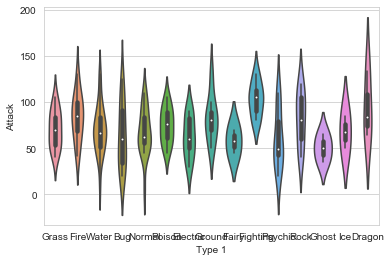

In [20]:
# Set theme
sns.set_style('whitegrid')     #default is darkgrid
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [21]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

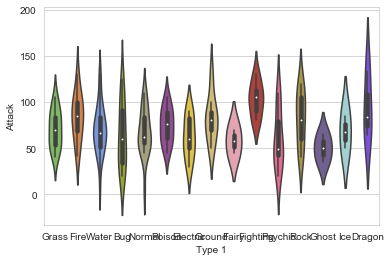

In [22]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette


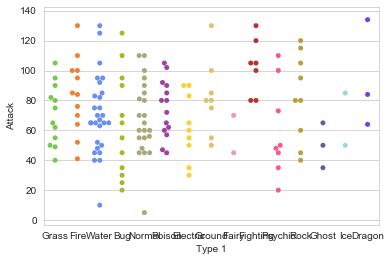

In [23]:
# Swarm plot with Pokemon color palette( This visualization will show each point, while "stacking" those with similar values)
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

# Overlaying plots 

Text(0.5, 1.0, 'Attack by Type')

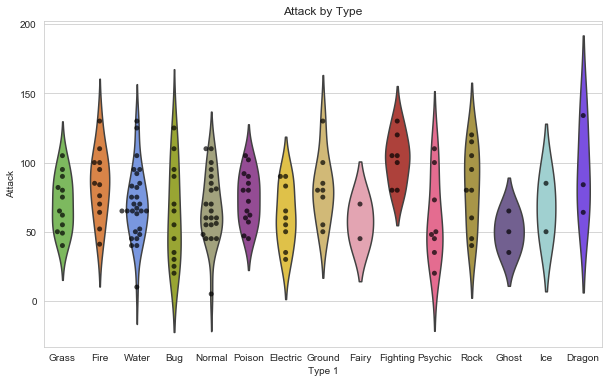

In [24]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

# Putting it all together

In [25]:
#Pandas's melt() function. It takes 3 arguments:
#First, the DataFrame to melt.
#Second, ID variables to keep (Pandas will melt all of the other ones).
#Finally, a name for the new, melted variable.

# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [26]:
print( stats_df.shape )
print( melted_df.shape ) #x6 times rows as compared to previous one

(151, 9)
(906, 5)


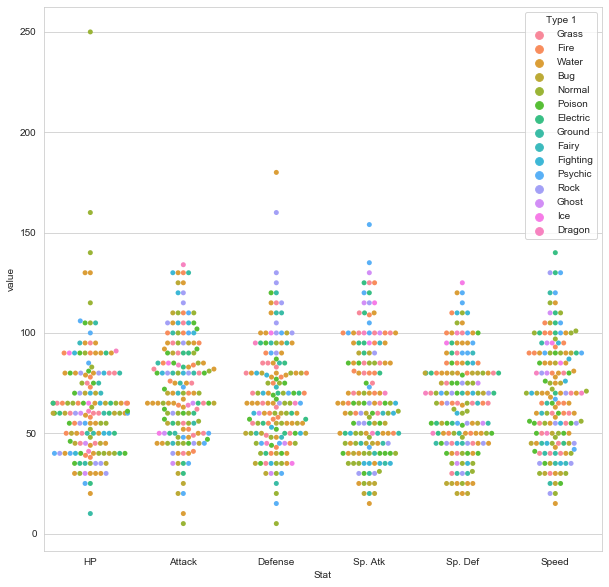

In [29]:
plt.figure(figsize=(10,10))
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

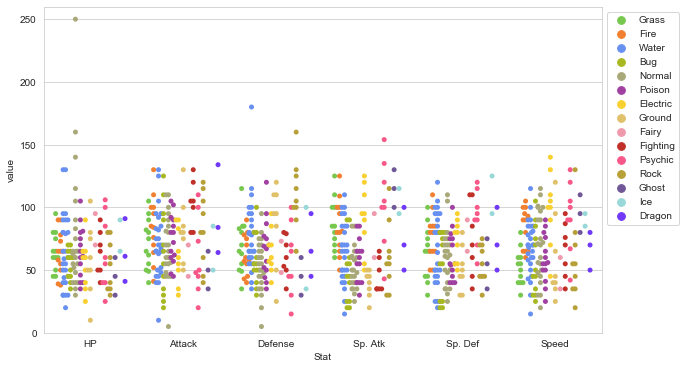

In [32]:
# tweaking
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)


# HeatMap

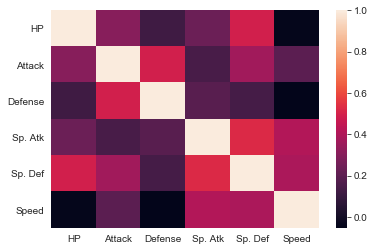

In [33]:
#Heatmaps help you visualize matrix-like data.

# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)


# Histogram

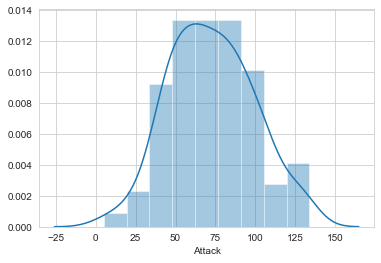

In [34]:
#Histograms allow you to plot the distributions of numeric variables.

# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

# Bar Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

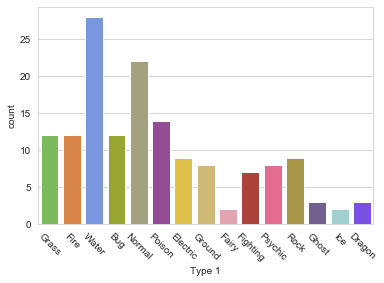

In [35]:
#Bar plots help you visualize the distributions of categorical variables.

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

# Factor Plot

C:\Users\user\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


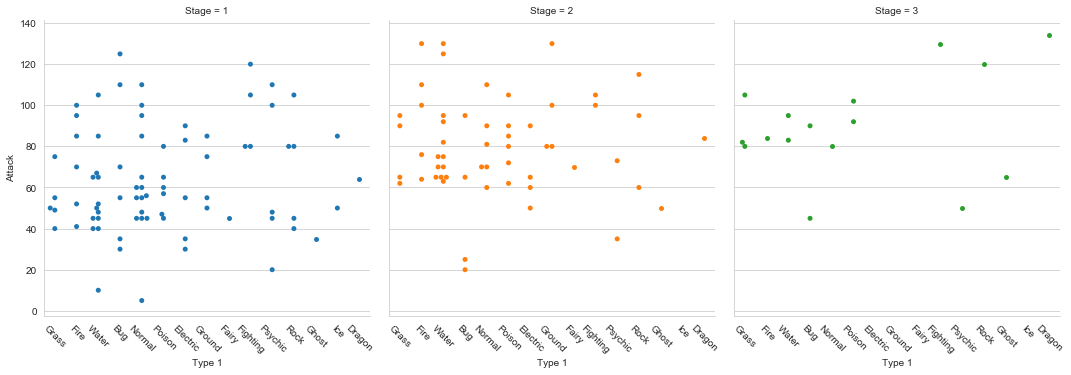

In [37]:
#Factor plots make it easy to separate plots by categorical classes.

#Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# Density Plot 

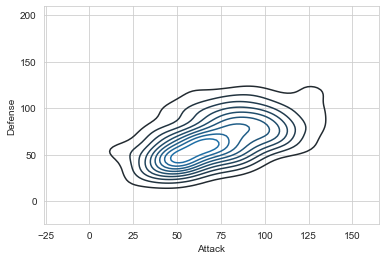

In [38]:
#Density plots display the distribution between two variables.

# Density Plot
sns.kdeplot(df.Attack, df.Defense)

# Joint Distribution Plot

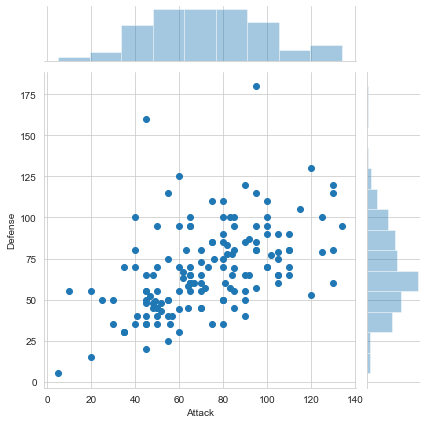

In [39]:
#Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)
